<a href="https://colab.research.google.com/github/nayna-chakole/My_repository-/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

In [ ]:
df=pd.read_csv("dataset_heart.csv")
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (270, 14)


In [ ]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting blood pressure,0
serum cholestoral,0
fasting blood sugar,0
resting electrocardiographic results,0
max heart rate,0
exercise induced angina,0
oldpeak,0


In [40]:
df.dtypes

,0
age,int64
sex,int64
chest pain type,int64
resting blood pressure,int64
serum cholestoral,int64
fasting blood sugar,int64
resting electrocardiographic results,int64
max heart rate,int64
exercise induced angina,int64
oldpeak,float64


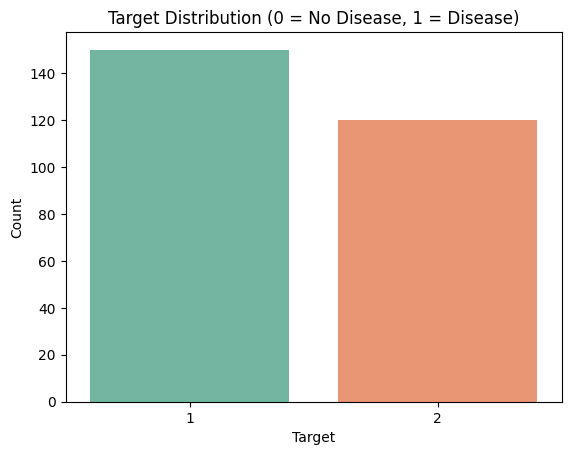

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df.rename(columns={'heart disease': 'target'}, inplace=True)

sns.countplot(x='target', data=df, palette='Set1')
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

<Figure size 640x480 with 0 Axes>

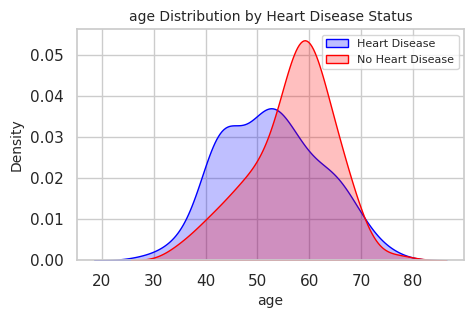

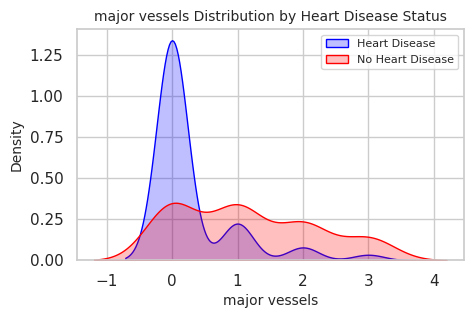

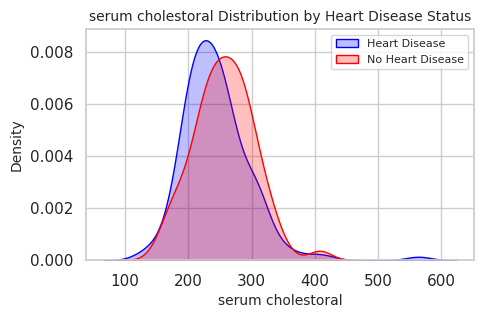

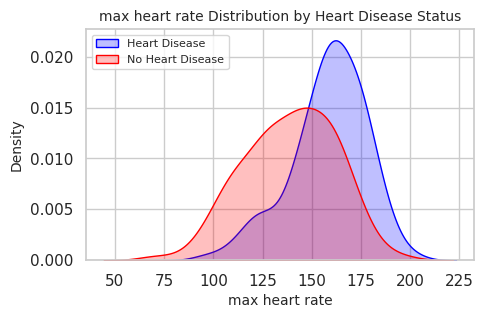

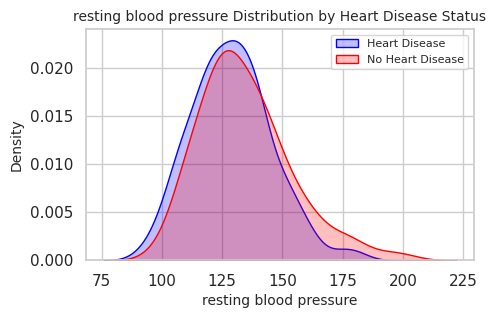

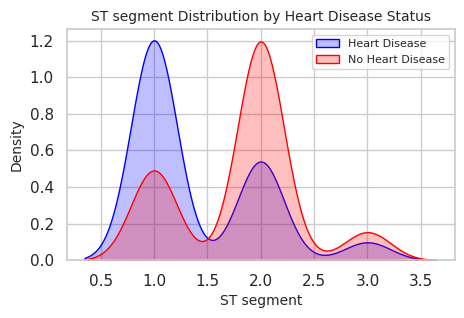

In [96]:

plt.suptitle('Distribution of Numerical Features', fontsize=16)

features = ['age', 'major vessels', 'serum cholestoral', 'max heart rate','resting blood pressure','ST segment']
for feature in features:
    plt.figure(figsize=(5, 3))
    sns.kdeplot(data=df[df['target'] == 1], x=feature, shade=True, color='blue', label='Heart Disease')
    sns.kdeplot(data=df[df['target'] == 2], x=feature, shade=True, color='red', label='No Heart Disease')
    plt.title(f'{feature} Distribution by Heart Disease Status', fontsize=10)
    plt.xlabel(feature,fontsize=10)
    plt.ylabel('Density',fontsize=10)
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.show()


                                           age      sex   chest pain type  \
age                                   1.000000 -0.094401         0.096920   
sex                                  -0.094401  1.000000         0.034636   
chest pain type                       0.096920  0.034636         1.000000   
resting blood pressure                0.273053 -0.062693        -0.043196   
serum cholestoral                     0.220056 -0.201647         0.090465   
fasting blood sugar                   0.123458  0.042140        -0.098537   
resting electrocardiographic results  0.128171  0.039253         0.074325   
max heart rate                       -0.402215 -0.076101        -0.317682   
exercise induced angina               0.098297  0.180022         0.353160   
oldpeak                               0.194234  0.097412         0.167244   
ST segment                            0.159774  0.050545         0.136900   
major vessels                         0.356081  0.086830         0.225890   

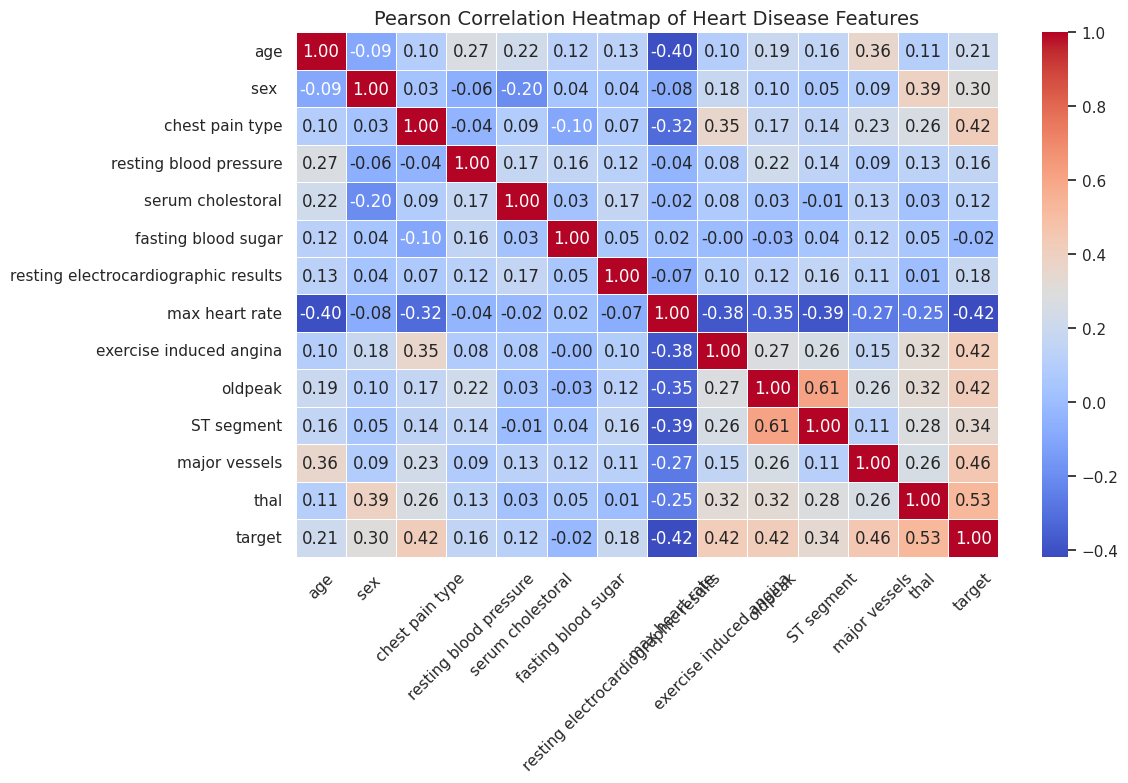

In [100]:
corr = df.corr(method='pearson')
print(corr)

plt.figure(figsize=(12, 8))
sns.set(style="white")
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Pearson Correlation Heatmap of Heart Disease Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
if y_pred[0] == 1:
    print("\nThe person have heart disease.")
else:
    print("\nThe person is not have heart disease.")

Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54


The person is not have heart disease.


In [122]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Disease', 'Heart Disease'])

df_report = pd.DataFrame(report).transpose()

df_report = df_report.round(2)

print("\n Performance Metrics Summary Table:")
print(df_report)



 Performance Metrics Summary Table:
               precision  recall  f1-score  support
No Disease          0.89    0.97      0.93    33.00
Heart Disease       0.94    0.81      0.87    21.00
accuracy            0.91    0.91      0.91     0.91
macro avg           0.92    0.89      0.90    54.00
weighted avg        0.91    0.91      0.91    54.00


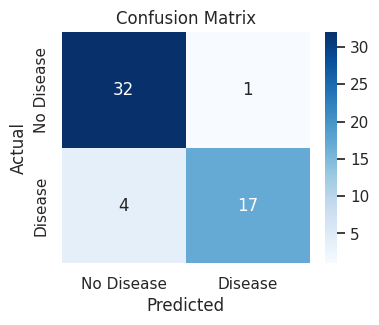

In [123]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
